# Long Short Term Memory Network (LSTM) - Function for All Tickers

## Stock Price Prediction

In [6]:
# Import dependencies

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Read the dataset into a pandas dataframe
df1 = pd.read_csv('../../launchit.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR,sector,industry,country,growth_rate,target_median_price,target_mean_price,target_high_price
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0


In [8]:
# Make a new copy of the dataset_train 
stock_data = df1.copy()

In [9]:
# Drop qualitative columns
stock_data = stock_data.drop(labels=['sector', 'industry', 'country', 'growth_rate', 'target_median_price', 'target_mean_price', 'target_high_price'], axis=1)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO


In [20]:
# Obtain list of all TCKR symbols
TCKR_symbols = pd.unique(stock_data.TCKR).tolist()
TCKR_symbols

['INDO',
 'OCFT',
 'SPT',
 'BILL',
 'EH',
 'XP',
 'PINE',
 'CAN',
 'SITM',
 'KRKR',
 'TELA',
 'CNTG',
 'SI',
 'RAPT',
 'AIH',
 'DAO',
 'PGNY',
 'TFFP',
 'BRP',
 'BRBR',
 'IPHA',
 'HBT',
 'BNTX',
 'MCBS',
 'OPRT',
 'PTON',
 'DDOG',
 'XGN',
 'NVST',
 'INMD',
 'ALRS',
 'NET',
 'SDC',
 'TXG',
 'CFB',
 'DT',
 'KRUS',
 'SNDL',
 'VIST',
 'CSTL',
 'HCAT',
 'NOVA',
 'AFYA',
 'IFS',
 'AMK',
 'FULC',
 'IHRT',
 'MIRM',
 'ORCC',
 'PHR',
 'DOYU',
 'REAL',
 'ADPT',
 'BBIO',
 'CHNG',
 'MORF',
 'CMBM',
 'GO',
 'PSNL',
 'CHWY',
 'FVRR',
 'CRWD',
 'RVLV',
 'GOTU',
 'BCYC',
 'IDYA',
 'RTLR',
 'AVTR',
 'FSLY',
 'PSTL',
 'JFIN',
 'SONM',
 'UBER',
 'HHR',
 'MEC',
 'SPFI',
 'PSN',
 'RRBI',
 'SCPL',
 'YJ',
 'BYND',
 'SY',
 'TMDX',
 'GNLN',
 'HOOK',
 'MNRL',
 'PINS',
 'ZM',
 'BWAY',
 'PLMR',
 'PD',
 'GHSI',
 'NGM',
 'SILK',
 'TW',
 'LYFT',
 'DTIL',
 'LEVI',
 'TIGR',
 'FUTU',
 'SWAV',
 'KLDO',
 'SLGG',
 'AREC',
 'HARP',
 'ALEC',
 'INMB',
 'NFE',
 'GBS',
 'IKT',
 'MASS',
 'UPST',
 'WISH',
 'ABCL',
 'CERT',
 'FDMT

In [22]:
def actual_data(df, symbol):
    # Isolate just 1 TCKR
    stock_data = df[df.TCKR == symbol]
    
    # Visualize stock prices history
    plt.figure(figsize=(15, 8))
    plt.title('Stock Prices History')
    plt.plot(stock_data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Prices ($)')

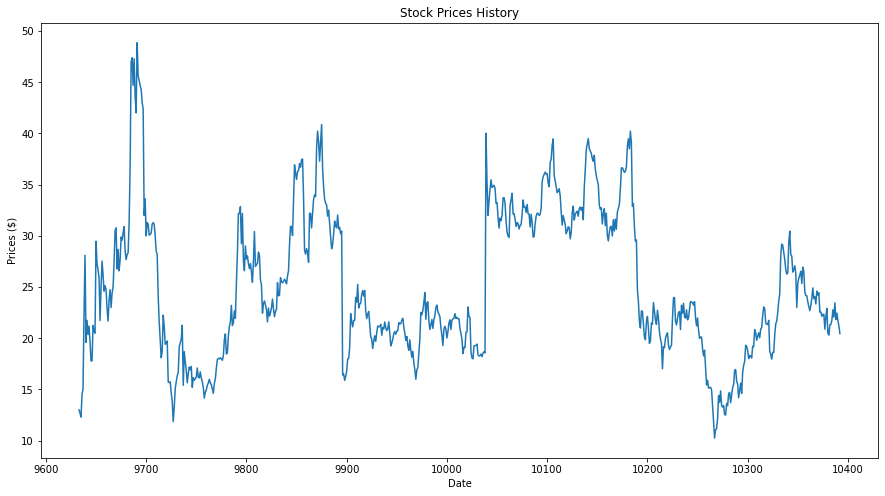

In [27]:
# Input whichever symbol into the actual_data function
actual_data(stock_data,'RAPT')

In [24]:
def LSTM_model(df, symbol):
    # Prepare the training set
    stock_data = df[df.TCKR == symbol]
    close_prices = stock_data['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Prepare the test set

    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    # Setting up the LSTM Network Architecture
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(25))
    model.add(layers.Dense(1))
    #model.summary()
    
    # Train the LSTM Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=3)
    
    # Evaluate the Model
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #rmse = np.sqrt(np.mean(predictions - y_test)**2)
    
    # Visualize the Predicted Prices
    data = stock_data.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

Epoch 1/3
548/548 [==============================] - 33s 46ms/step - loss: 0.0093
Epoch 2/3
548/548 [==============================] - 25s 46ms/step - loss: 0.0041
Epoch 3/3
5/5 [==============================] - 2s 54ms/step


C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


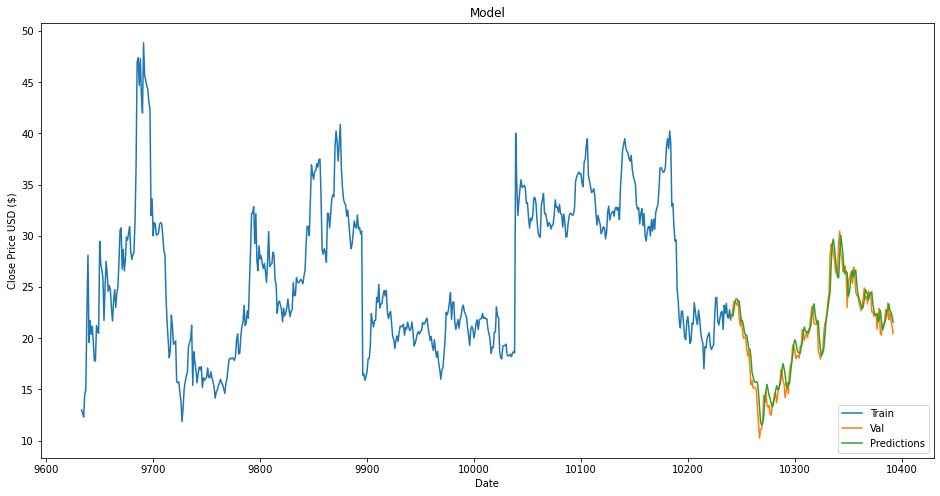

In [28]:
# Input whichever symbol into the LSTM_model function
LSTM_model(stock_data,'RAPT')